# Import and Process Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from google.colab import drive

drive.mount('/content/drive')
data_path = '/content/drive/My Drive/MNIST_CSV/mnist_train.csv'


df = pd.read_csv(data_path, header=None)
tr_data = df[(df.iloc[:, 0] == 3) | (df.iloc[:, 0] == 4)]

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tr_data.iloc[:,1:])

pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
y_train, x_train = tr_data.iloc[:, 0], tr_data.iloc[:, 1:]
y_train = pd.DataFrame(np.array(y_train), columns=['y'])
pca_train = pd.concat([pca_df, y_train], axis=1)
pca_train

Mounted at /content/drive


,PCA1,PCA2,y
0,-547.480305,-437.033570,4
1,552.342623,751.789109,3
2,-860.211165,446.867474,4
3,1016.061786,576.690985,3
4,1333.012521,-857.879069,3
...,...,...,...
11968,118.084971,839.598048,3
11969,-688.864351,274.718030,4
11970,1012.511577,468.036029,3
11971,602.674248,634.439827,3


In [7]:
test_data_path = '/content/drive/My Drive/MNIST_CSV/mnist_test.csv'

# 使用Pandas读取CSV文件, 筛选要的数据
df_test = pd.read_csv(test_data_path, header=None)
# filter 3 & 4
test_data = df_test[(df_test.iloc[:, 0] == 3) | (df_test.iloc[:, 0] == 4)]
test_data
X_test, y_test = test_data.iloc[:,1:].to_numpy(), test_data.iloc[:,0].to_numpy()
# pca transform X
pca_test = pca.transform(X_test)
pca_test
pca_test = pd.DataFrame(pca_test, columns=['PCA1', 'PCA2'])
pca_test


,PCA1,PCA2
0,-789.275426,-437.865987
1,-400.728484,-61.618192
2,483.689485,-695.374156
3,-655.878816,-108.018998
4,-526.303765,-413.750296
...,...,...
1987,-673.876956,483.631270
1988,590.689437,125.265280
1989,-932.387658,408.653272
1990,1292.079853,-252.495680


# KNN

In [8]:
# calculate and return distance between two points
def distance(trainX, testX, tr_col, t_col):
    # Euclidean distance
    # the three lines of codes below only speeds up the calculation
    a = trainX[tr_col]
    b = testX[t_col]
    return np.linalg.norm(a-b)


# main implemtation of knn (return pred results)
def knn(k, trainX, testX, trainY, tr_idx, t_idx): # tr_idx is a list
    print("KNN for K = ",k)
    pred = []
    for t_col in t_idx:
    #for t_col in range(len(testX[0])):
        dis_to_all = [] # [dis1, .. , dis10]
        for tr_col in tr_idx:
        #for tr_col in range(len(trainX[0])):
            dis_to_all.append(distance(trainX, testX, tr_col, t_col))
        sorted_dis = [i[0] for i in sorted(enumerate(dis_to_all), key=lambda x:x[1])]

        # majority vote
        votes = {}
        for i in sorted_dis[:k]:
            vote_for = trainY[tr_idx, ][i]
            if vote_for in votes.keys():
                votes[vote_for] += 1
            else:
                votes[vote_for] = 1
        pred.append(max(votes, key = votes.get))
    print("When K = ", k, ", prediction is : ")
    #print(pred)

    return pred # record this!


In [9]:
def get_accuracy(true_y, predicted_y):
    correct_predictions = sum(t == p for t, p in zip(true_y, predicted_y))
    accuracy = correct_predictions / len(true_y)

    print(f"Accuracy: {accuracy:.8f}")
    return accuracy

# Train

-------- k =  1
---- 1. training: pass
---- 2. testing: 
KNN for K =  1
When K =  1 , prediction is : 
Accuracy: 0.96937751

-------- k =  2
---- 1. training: pass
---- 2. testing: 
KNN for K =  2
When K =  2 , prediction is : 
Accuracy: 0.96937751

-------- k =  3
---- 1. training: pass
---- 2. testing: 
KNN for K =  3
When K =  3 , prediction is : 
Accuracy: 0.97640562

-------- k =  4
---- 1. training: pass
---- 2. testing: 
KNN for K =  4
When K =  4 , prediction is : 
Accuracy: 0.97740964

-------- k =  5
---- 1. training: pass
---- 2. testing: 
KNN for K =  5
When K =  5 , prediction is : 
Accuracy: 0.97941767

[0.9693775100401606, 0.9693775100401606, 0.9764056224899599, 0.9774096385542169, 0.9794176706827309]


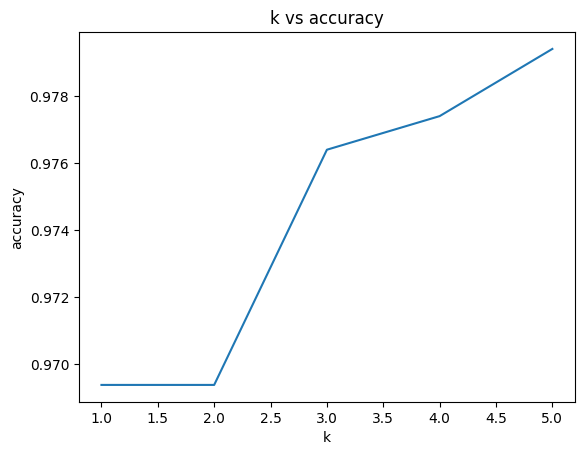

In [10]:
# test performance and do prediction
def predict(trainX, trainY, testX, testY, file_name):
    acc = []
    for k in range(1, 6):
        print("-------- k = ", k)
        print("---- 1. training: pass")
        #pred = knn(k, trainX, trainX, trainY, range(len(trainX)), range(len(trainX)))
        #show_metrics(pred, trainY, range(len(trainY)))
        print("---- 2. testing: ")
        pred = knn(k, trainX, testX, trainY, range(len(trainX)), range(len(testX)))
        cur = get_accuracy(testY, pred)
        acc.append(cur)
        print("")
    print(acc)
    plt.plot([1,2,3,4,5], acc)
    plt.title("k vs accuracy")
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.savefig(file_name, format="png")
    plt.show()
trainX, trainY = pca_train.iloc[:, :2].to_numpy(), pca_train.iloc[:,2].to_numpy()
testX = pca_test.to_numpy()
predict(trainX, trainY, testX, y_test, "knn.png")

# KNN Regression

## New data

In [2]:
X_train_F = pd.read_csv('/content/drive/My Drive/X_train_F.csv', header=None).to_numpy()
Y_train_F = pd.read_csv('/content/drive/My Drive/Y_train_F.csv', header=None).to_numpy()
X_test_F = pd.read_csv('/content/drive/My Drive/X_test_F.csv', header=None).to_numpy()
Y_test_F = pd.read_csv('/content/drive/My Drive/Y_test_F.csv', header=None).to_numpy()


-------- k =  1
---- 1. training: pass
---- 2. testing: 
KNN for K =  1
When K =  1 , prediction is : 

-------- k =  2
---- 1. training: pass
---- 2. testing: 
KNN for K =  2
When K =  2 , prediction is : 

-------- k =  3
---- 1. training: pass
---- 2. testing: 
KNN for K =  3
When K =  3 , prediction is : 

[5.331388837683408, 4.348431462238254, 3.8385431009312616]


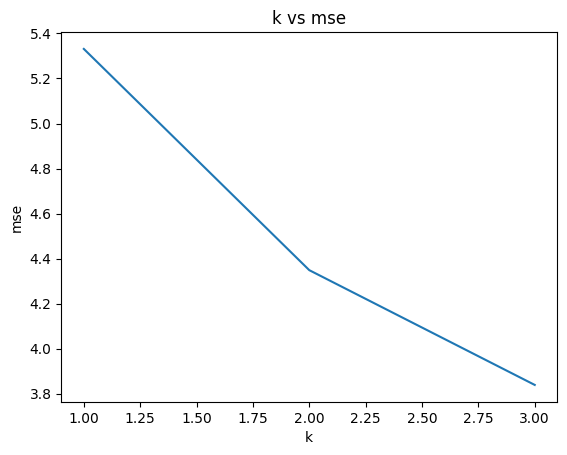

In [3]:
# calculate and return distance between two points
def distance(trainX, testX, tr_col, t_col):
    # Euclidean distance
    # the three lines of codes below only speeds up the calculation
    a = trainX[tr_col]
    b = testX[t_col]
    return np.linalg.norm(a-b)

# modify for regression
def knn_regression(k, trainX, testX, trainY, tr_idx, t_idx): # tr_idx is a list
    print("KNN for K = ",k)
    pred = []
    for t_col in t_idx:
    #for t_col in range(len(testX[0])):
        dis_to_all = [] # [dis1, .. , dis10]
        for tr_col in tr_idx:
        #for tr_col in range(len(trainX[0])):
            dis_to_all.append(distance(trainX, testX, tr_col, t_col))
        sorted_dis = [i[0] for i in sorted(enumerate(dis_to_all), key=lambda x:x[1])]

        # vote: calculate mean
        votes = []
        for i in sorted_dis[:k]:
            vote_for = trainY[tr_idx, ][i]
            #print(vote_for)
            votes.append(vote_for)
        pred.append(sum(votes)/len(votes))
    print("When K = ", k, ", prediction is : ")
    #print(len(pred))

    return pred # record this!

# test performance and do prediction
def predict_reg(trainX, trainY, testX, testY, file_name):
    mse = []
    for k in range(1, 4):
        print("-------- k = ", k)
        print("---- 1. training: pass")
        print("---- 2. testing: ")
        pred = knn_regression(k, trainX, testX, trainY, range(len(trainX)), range(len(testX)))
        cur = np.mean((pred-testY)**2)
        mse.append(cur)
        print("")
    print(mse)
    plt.plot([1,2,3], mse)
    plt.title("k vs mse")
    plt.xlabel('k')
    plt.ylabel('mse')
    plt.savefig(file_name, format="png")
    plt.show()
predict_reg(X_train_F, Y_train_F, X_test_F, Y_test_F, "knn_reg.png")

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# def new_distance(x1, x2):
#     # 这里需要实现计算两个样本点之间距离的逻辑，例如使用欧式距离
#     return np.sqrt(np.sum((x1 - x2) ** 2))

# def knn_regression(k, trainX, testX, trainY):
#     pred = []
#     for t in testX:
#         dis_to_all = [distance(t, tr) for tr in trainX]
#         sorted_indices = np.argsort(dis_to_all)
#         votes = trainY[sorted_indices[:k]]
#         pred.append(np.mean(votes))
#     return pred

# def predict_reg(trainX, trainY, testX, testY, file_name):
#     mse = []
#     for k in range(1, 4):
#         pred = knn_regression(k, trainX, testX, trainY)
#         cur_mse = np.mean((pred-testY)**2)
#         mse.append(cur_mse)

#     plt.plot([1, 2, 3], mse)
#     plt.title("k vs MSE")
#     plt.xlabel('k')
#     plt.ylabel('MSE')
#     plt.savefig(file_name, format="png")
#     plt.show()

# # 假定X_train_F, Y_train_F, X_test_F, Y_test_F是已经定义好的训练集和测试集
# # predict_reg(X_train_F, Y_train_F, X_test_F, Y_test_F, "knn_reg.png")
# predict_reg(X_train_F, Y_train_F, X_test_F, Y_test_F, "knn_reg.png")

In [ ]:
for x in X_train_F[:10]:
    print(x)